Roger Apéry's proof of the irrationality of ζ(3) (the Riemann zeta function evaluated at 3)
* 🚀 📚


Tutor: Anthropic's AI Claude

"""
Title: Irrationality of ζ2 and ζ3
Author: Roger Apéry
Source: Société Mathématique de France, Astérisque 61 (1979) p. 11-13

General Method:
The method for proving irrationality of a real number α defined by partial sums σn
of a series of rationals involves these steps:

1. Replace sequence σn = u0,n with a double-indexed sequence uk,n where 0≤k≤n
   such that for each k, uk,n converges to α faster than uk-1,n

2. Set uk,n = tk,n/(n+k choose k)

3. Bound the denominator of tk,n as a function of n only:
   Show there exists sequence of integers pn where pn*tk,n is integer and pn ≤ μ^(n+ε)

4. Perform same linear combination (depending on n) with integer coefficients on
   column n of tk,n and (n+k choose k)

5. Obtain sequence vn/un of fractions with rational numerator and integer denominator
   Determine common limit λ of nth root of vn and un

6. If lucky, λ > μ: can conclude irrationality
   Can also deduce irrationality measure: for any integers p,q:
   |p/q - α| > 1/(q^(1+ε))

For ζ(2):
- Series expansion: 1/n² = 1/(n(n-1)) - 1/(n(n-1)(n-2)) + ... + (-1)^(k-1)k!/(n(n-1)...(n-k+1)) + ...
- μ = e²
- un sequence: (1,3,19,147,1251,11253,...)
- vn sequence: (0,5,125/4,...)
- Recurrence: (n+1)²un+1 - (11n²+11n+3)un - (n-1)²un-1 = 0
- λ = (11+5√5)/2
- Irrationality of ζ(2)=π²/6 known since Euler, but method gives irrationality measure

For ζ(3):
- Series expansion: 1/n³ = 1/(n(n²-1)) - 1/(n(n²-1)(n²-4)) + ... + (-1)^k(k!)²/(n(n²-1)...(n²-(k+1)²)) + ...
- Expression: ζ(3) = 5/2 Σ (-1)^(n-1)/(n³(2n choose n))
- μ = e³
- un sequence: (1,5,73,1445,33001,...)
- vn sequence: (0,6,351/4,62531/36,...)
- Recurrence: (n+1)³un+1 - (34n³+51n²+27n+5)un + n³un-1 = 0
- λ = 17+12√2

Author contact:
Roger APERY
Département de Mathématiques
Esplanade de la Paix
14032 CAEN CEDEX
"""

Series expansion for 1/n² (n=5):
Sum of first 5 terms: 0.049999999999999996
Actual value of 1/5²: 0.04

Series expansion for 1/n³ (n=5):
Sum of first 5 terms: 0.008091269841269842
Actual value of 1/5³: 0.008


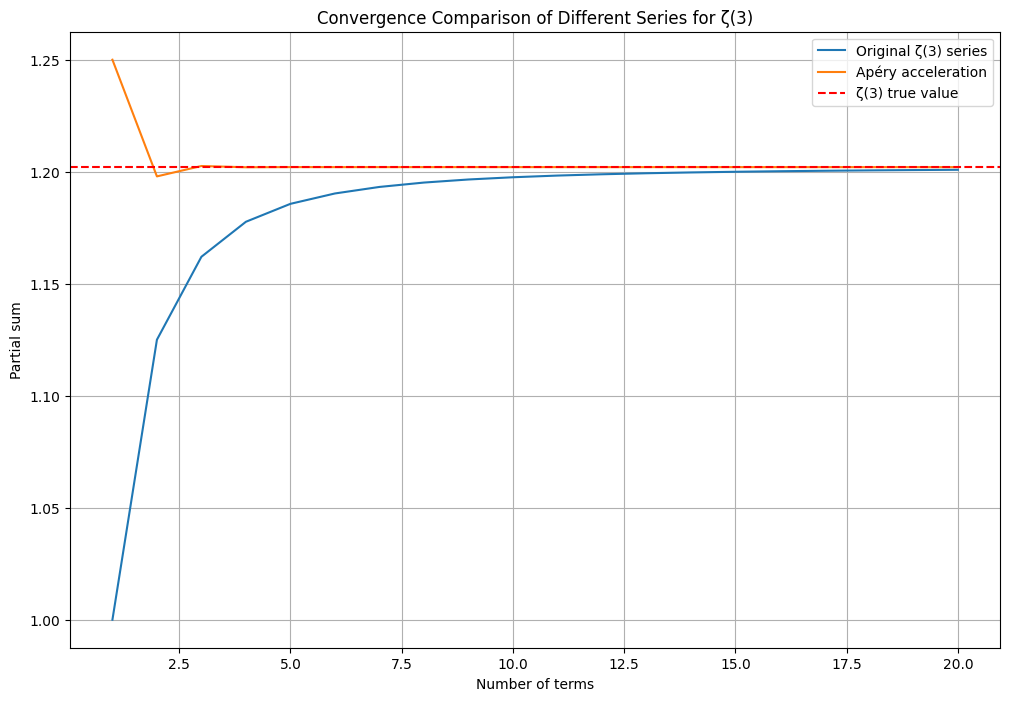

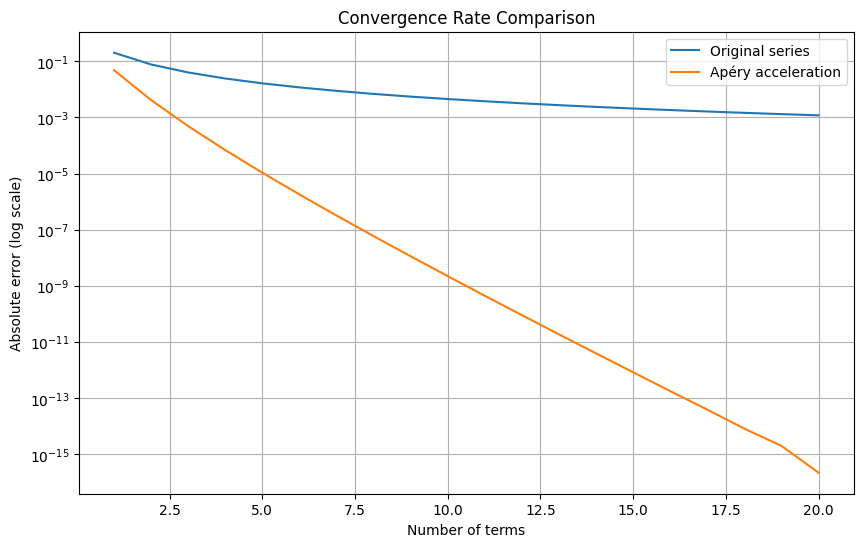

In [1]:
"""
Abstract:
This script implements and analyzes the series expansions used in Apéry's proof.
It focuses on the convergence properties of the series for both ζ(2) and ζ(3),
demonstrates the acceleration of convergence through Apéry's transformations,
and provides visual and numerical analysis of the convergence rates.

Author: Based on Roger Apéry's 1979 paper
Date: 2025
"""

import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from typing import Callable, List, Tuple

def zeta2_term(n: int, k: int) -> float:
    """
    Compute k-th term in the series expansion for 1/n².

    Parameters:
    -----------
    n : int
        Parameter n
    k : int
        Term index

    Returns:
    --------
    float
        Value of the k-th term
    """
    if k == 0:
        return 1/(n*(n-1))

    # Compute numerator
    numerator = (-1)**(k-1) * factorial(k)

    # Compute denominator
    denominator = n
    for i in range(k):
        denominator *= (n-i)

    return numerator/denominator

def zeta3_term(n: int, k: int) -> float:
    """
    Compute k-th term in the series expansion for 1/n³.
    """
    if k == 0:
        return 1/(n*(n**2-1))

    # Compute numerator
    numerator = (-1)**k * (factorial(k))**2

    # Compute denominator
    denominator = n
    for i in range(k+1):
        denominator *= (n**2 - i**2)

    return numerator/denominator

def apery_acceleration(n: int) -> float:
    """
    Compute Apéry's accelerated series term for ζ(3).
    """
    from math import comb
    return 5/2 * (-1)**(n-1)/(n**3 * comb(2*n, n))

def compare_convergence(max_n: int, max_terms: int) -> None:
    """
    Compare convergence rates of different series representations.
    """
    plt.figure(figsize=(12, 8))

    # Original series 1/n³
    original = [sum(1/k**3 for k in range(1, n+1)) for n in range(1, max_n+1)]
    plt.plot(range(1, max_n+1), original, label='Original ζ(3) series')

    # Apéry's series
    apery = [sum(apery_acceleration(k) for k in range(1, n+1))
            for n in range(1, max_n+1)]
    plt.plot(range(1, max_n+1), apery, label='Apéry acceleration')

    # True value of ζ(3)
    plt.axhline(y=1.202056903159594, color='r', linestyle='--',
                label='ζ(3) true value')

    plt.xlabel('Number of terms')
    plt.ylabel('Partial sum')
    plt.title('Convergence Comparison of Different Series for ζ(3)')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_convergence_rate():
    """
    Analyze and visualize the convergence rates of different approaches.
    """
    n_values = range(1, 21)

    # Compute errors for different approaches
    original_errors = []
    apery_errors = []
    true_value = 1.202056903159594  # ζ(3)

    for n in n_values:
        # Original series error
        original_sum = sum(1/k**3 for k in range(1, n+1))
        original_errors.append(abs(original_sum - true_value))

        # Apéry series error
        apery_sum = sum(apery_acceleration(k) for k in range(1, n+1))
        apery_errors.append(abs(apery_sum - true_value))

    # Plot errors on log scale
    plt.figure(figsize=(10, 6))
    plt.semilogy(n_values, original_errors, label='Original series')
    plt.semilogy(n_values, apery_errors, label='Apéry acceleration')
    plt.xlabel('Number of terms')
    plt.ylabel('Absolute error (log scale)')
    plt.title('Convergence Rate Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Demonstrate series expansions
    n, max_terms = 5, 5

    print(f"Series expansion for 1/n² (n={n}):")
    sum_zeta2 = sum(zeta2_term(n, k) for k in range(max_terms))
    print(f"Sum of first {max_terms} terms: {sum_zeta2}")
    print(f"Actual value of 1/{n}²: {1/n**2}")

    print(f"\nSeries expansion for 1/n³ (n={n}):")
    sum_zeta3 = sum(zeta3_term(n, k) for k in range(max_terms))
    print(f"Sum of first {max_terms} terms: {sum_zeta3}")
    print(f"Actual value of 1/{n}³: {1/n**3}")

    # Compare convergence rates
    compare_convergence(max_n=20, max_terms=10)
    analyze_convergence_rate()